In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [44]:
df = pd.read_csv("mall customers.csv")

In [45]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [46]:
df = df.drop('CustomerID', axis=1)

In [47]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [48]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [49]:
df = df.rename(columns = {'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})

# EDA

In [50]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [65]:
df.income.describe

<bound method NDFrame.describe of 0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: income, Length: 200, dtype: int64>

In [51]:
df.income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

In [54]:
print("size:", df.size )
print("shape:", df.shape )
print("type:", df.dtypes)
print("Describe:", df.describe())

size: 800
shape: (200, 4)
type: gender    object
age        int64
income     int64
score      int64
dtype: object
Describe:               age      income       score
count  200.000000  200.000000  200.000000
mean    38.850000   60.560000   50.200000
std     13.969007   26.264721   25.823522
min     18.000000   15.000000    1.000000
25%     28.750000   41.500000   34.750000
50%     36.000000   61.500000   50.000000
75%     49.000000   78.000000   73.000000
max     70.000000  137.000000   99.000000


In [64]:
df.gender

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: gender, Length: 200, dtype: object

##### end

In [11]:
# Check Duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found!")
    duplicate_rows = df[duplicates]
    print(duplicate_rows)
else:
    print("No duplicates found.")

No duplicates found.


In [10]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

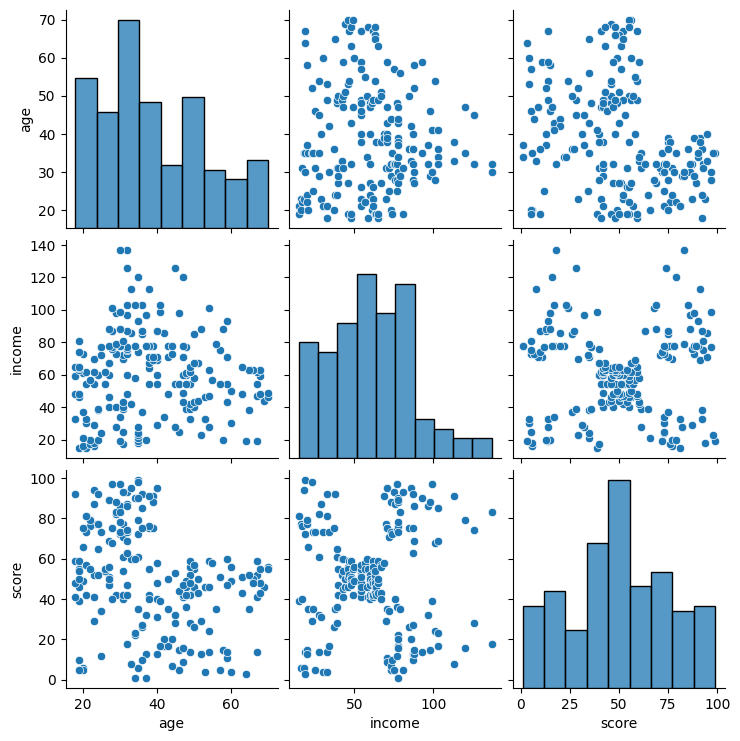

In [13]:
sns.pairplot(df[['age','income', 'score']])

In [14]:
km = KMeans(n_clusters=8)

In [15]:
km.fit(df[['score', 'income']])

KMeans()

In [16]:
df['new_cluster1'] = km.predict(df[['score', 'income']])

In [17]:
df.head()

,gender,age,income,score,new_cluster1
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


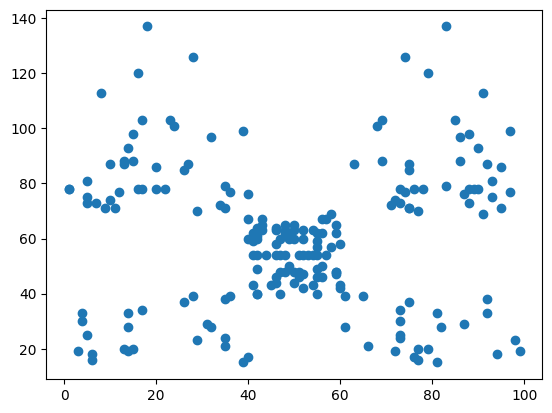

In [18]:
plt.scatter(df.score, df.income)

In [19]:
df0 = df[df.new_cluster1 == 0]

In [20]:
df0.head()

,gender,age,income,score,new_cluster1
180,Female,37,97,32,0
182,Male,46,98,15,0
184,Female,41,99,39,0
186,Female,54,101,24,0
188,Female,41,103,17,0


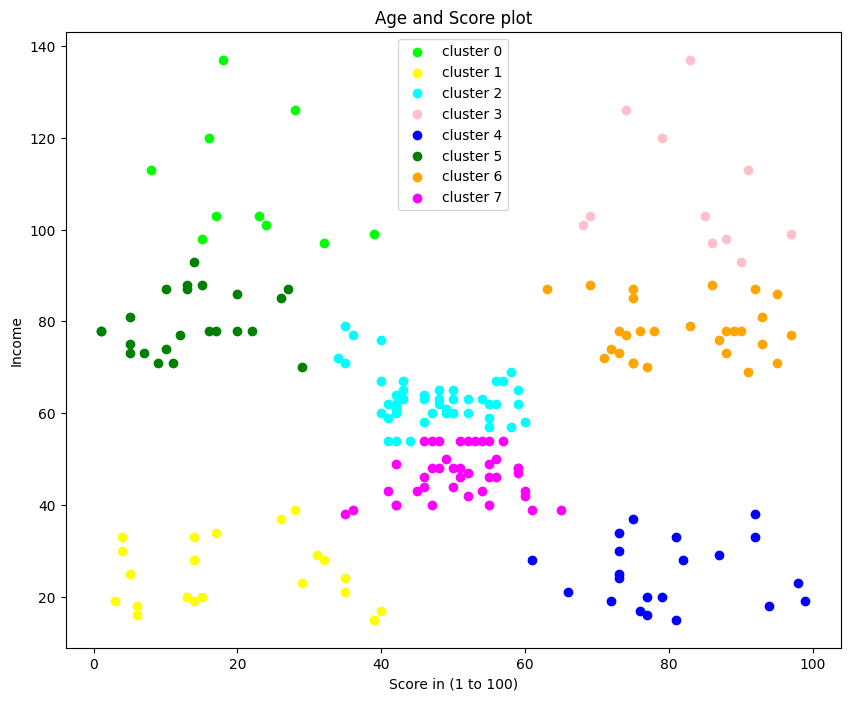

In [21]:
df0 = df[df.new_cluster1 == 0]
df1 = df[df.new_cluster1 == 1]
df2 = df[df.new_cluster1 == 2]
df3 = df[df.new_cluster1 == 3]
df4 = df[df.new_cluster1 == 4]
df5 = df[df.new_cluster1 == 5]
df6 = df[df.new_cluster1 == 6]
df7 = df[df.new_cluster1 == 7]

plt.figure(figsize=(10,8))

plt.scatter(df0.score , df0.income, color='#00ff00', label='cluster 0')
plt.scatter(df1.score , df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score , df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score , df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score , df4.income, color='blue', label='cluster 4')
plt.scatter(df5.score , df5.income, color='green', label='cluster 5')
plt.scatter(df6.score , df6.income, color='orange', label='cluster 6')
plt.scatter(df7.score , df7.income, color='magenta', label='cluster 7')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()

In [22]:
center1 = km.cluster_centers_
center1

array([[ 22.        , 109.7       ],
       [ 19.52380952,  25.14285714],
       [ 47.31111111,  63.15555556],
       [ 82.72727273, 108.18181818],
       [ 80.04761905,  25.0952381 ],
       [ 13.39130435,  79.73913043],
       [ 81.89285714,  78.03571429],
       [ 50.95121951,  46.56097561]])

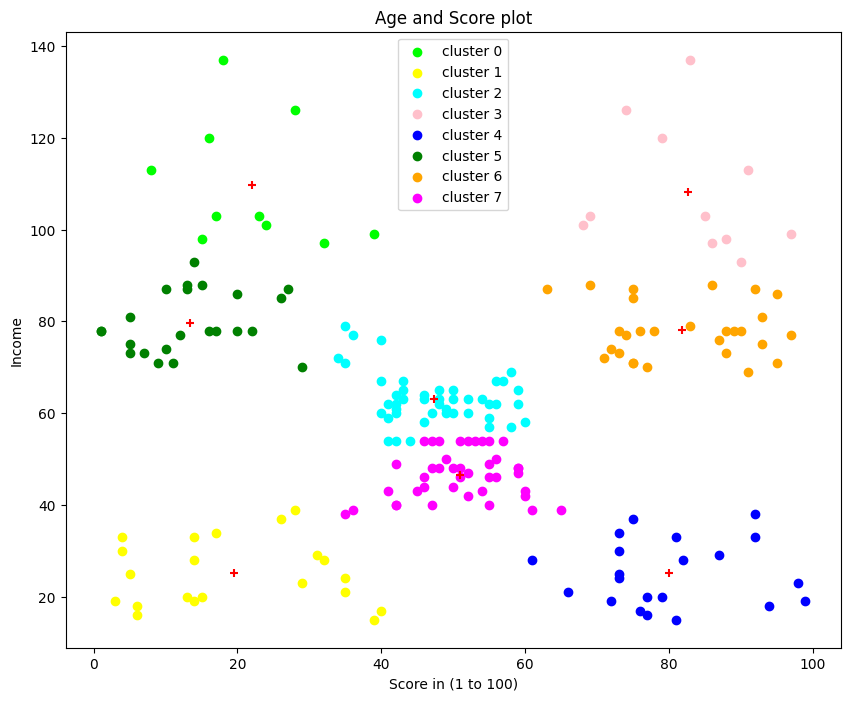

In [23]:
df0 = df[df.new_cluster1 == 0]
df1 = df[df.new_cluster1 == 1]
df2 = df[df.new_cluster1 == 2]
df3 = df[df.new_cluster1 == 3]
df4 = df[df.new_cluster1 == 4]
df5 = df[df.new_cluster1 == 5]
df6 = df[df.new_cluster1 == 6]
df7 = df[df.new_cluster1 == 7]

plt.figure(figsize=(10,8))

plt.scatter(df0.score , df0.income, color='#00ff00', label='cluster 0')
plt.scatter(df1.score , df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score , df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score , df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score , df4.income, color='blue', label='cluster 4')
plt.scatter(df5.score , df5.income, color='green', label='cluster 5')
plt.scatter(df6.score , df6.income, color='orange', label='cluster 6')
plt.scatter(df7.score , df7.income, color='magenta', label='cluster 7')

plt.scatter(center1[:,0], center1[:,1], color='red', marker='+')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()

In [24]:
wcss = []
cluster_range = range(1, 50)

for k in cluster_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

In [25]:
wcss

[269981.2800000001,
 181363.59595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 24995.969781135962,
 21862.09267218289,
 19787.670554966855,
 17595.28888108518,
 15808.588580096646,
 14314.980233818469,
 12775.343451156687,
 12037.059828883706,
 11090.885370426675,
 10031.166047171218,
 9398.924984737485,
 8797.156223172875,
 8198.67973099144,
 7712.237523452678,
 7235.685024154591,
 6781.02732961483,
 6361.622630992198,
 6087.864663441133,
 5912.06657046657,
 5457.564263514264,
 5342.605616605617,
 4811.318082407789,
 4650.816782918702,
 4670.244344246262,
 4252.539393939394,
 4060.0775676937446,
 3699.9671717171723,
 3661.497485847486,
 3489.0602092352096,
 3429.034884559885,
 3174.038539238539,
 3068.3433982683982,
 2779.5987373737375,
 2679.1433982683984,
 2624.588455988456,
 2472.7132395382396,
 2311.7386363636365,
 2244.176948051948,
 2223.38170995671,
 2163.8395021645024,
 1989.417207792208,
 1959.8191919191922]

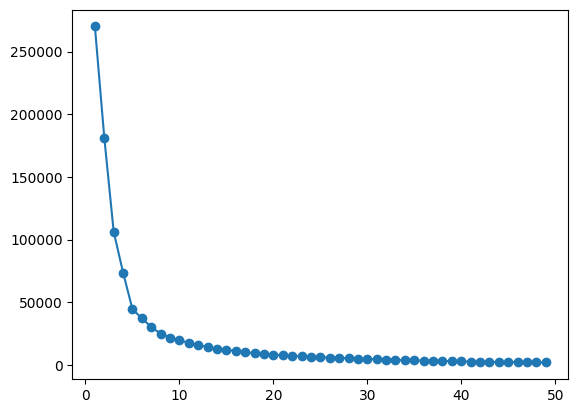

In [26]:
plt.plot(cluster_range, wcss, marker='o')

In [27]:
from kneed import KneeLocator

kn = KneeLocator(cluster_range, wcss, curve='convex', direction='decreasing')

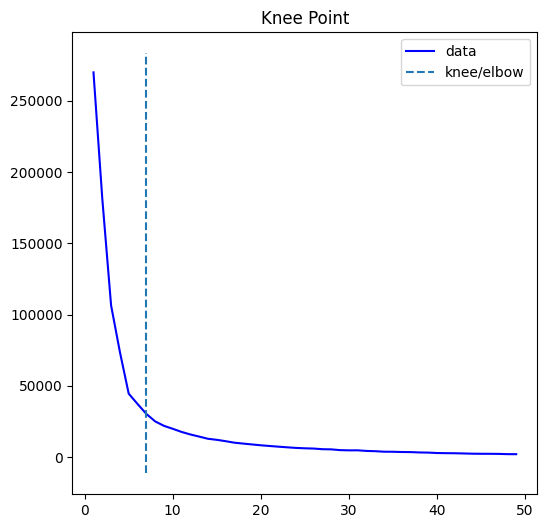

In [28]:
kn.plot_knee()

In [29]:
km3 = KMeans(n_clusters=5)  # creating kmeans object
km3.fit(df[['score', 'income']])

KMeans(n_clusters=5)

In [30]:
df['optimize_clusters'] = km3.predict(df[['score', 'income']])
df.head()

,gender,age,income,score,new_cluster1,optimize_clusters
0,Male,19,15,39,1,4
1,Male,21,15,81,4,3
2,Female,20,16,6,1,4
3,Female,23,16,77,4,3
4,Female,31,17,40,1,4


In [31]:
centrer2 = km3.cluster_centers_

In [32]:
centrer2

array([[82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [20.91304348, 26.30434783]])

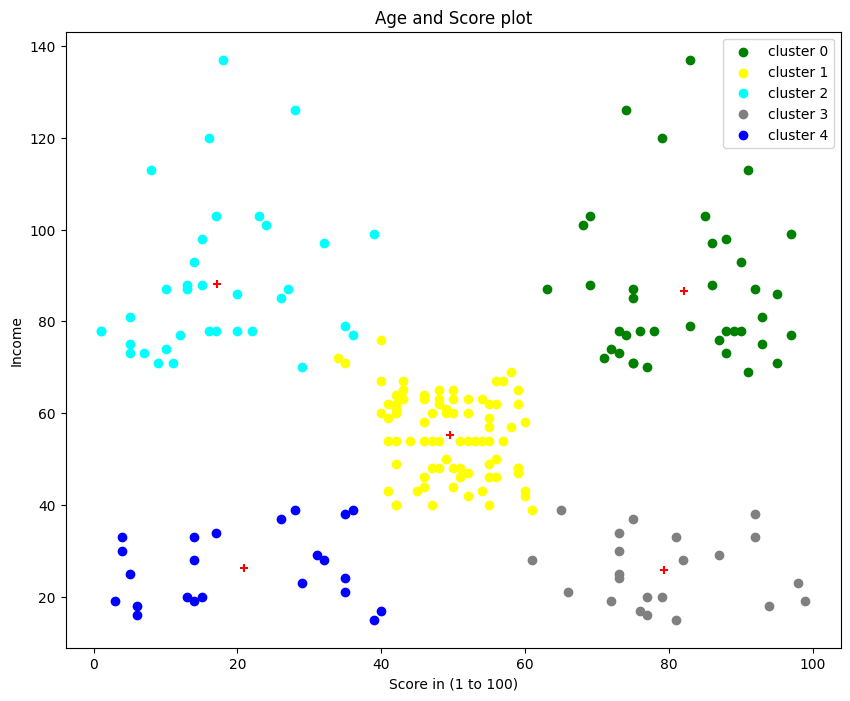

In [33]:
df0 = df[df.optimize_clusters == 0]
df1 = df[df.optimize_clusters == 1]
df2 = df[df.optimize_clusters == 2]
df3 = df[df.optimize_clusters == 3]
df4 = df[df.optimize_clusters == 4]

plt.figure(figsize=(10,8))

plt.scatter(df0.score , df0.income, color='green', label='cluster 0')
plt.scatter(df1.score , df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score , df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score , df3.income, color='gray', label='cluster 3')
plt.scatter(df4.score , df4.income, color='blue', label='cluster 4')

plt.scatter(centrer2[:,0], centrer2[:,1], color='red', marker='+')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()

In [66]:
 import string

In [67]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [68]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [1]:
word = input()
rword = word[::-1]

if word == rword:
    print("This is polydrome")
else:
    print("This is not polydorme")

tenet
This is polydrome
